# Fraudulent Transactions Prediction

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Data Dictionary

#### step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

#### type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
#### amount - amount of the transaction in local currency.
#### nameOrig - customer who started the transaction
#### oldbalanceOrg - initial balance before the transaction
#### newbalanceOrig - new balance after the transaction
#### nameDest - customer who is the recipient of the transaction
#### oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
#### newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
#### isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
#### isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Data Analysis & Cleaning

In [3]:
# Number of Rows & Columns
df.shape

(6362620, 11)

In [4]:
# Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Checking Null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Total number of unique values for each column
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [7]:
# Checking Unique values in column 'type'
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<AxesSubplot:title={'center':'Transaction'}, xlabel='type', ylabel='count'>

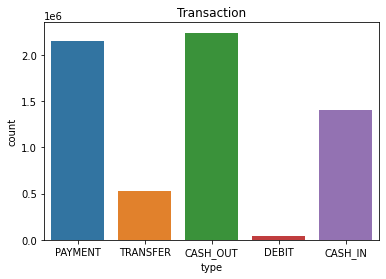

In [8]:
# Visualizing unique values in 'type'
plt.title('Transaction')
sns.countplot(df['type'])

In [9]:
# Calculating Genuine & Fraud transactions
genuine = len(df[df.isFraud==0])
fraud = len(df[df.isFraud==1])
print(f'Genuine :', genuine)
print(f'Fraud :', fraud)

# Calculating Genuine & Fraud transactions in percentage
genuine_percent = (genuine / (fraud + genuine)) * 100
fraud_percent = (fraud / (fraud + genuine)) * 100
print('Genuine Transactions Percentage : {:.2f} %'.format(genuine_percent))
print('Fraud Transactions Percentage : {:.2f} %'.format(fraud_percent))

Genuine : 6354407
Fraud : 8213
Genuine Transactions Percentage : 99.87 %
Fraud Transactions Percentage : 0.13 %


### Only 0.13 % of Transactions are Fraud

## Correlation Heatmap

<AxesSubplot:>

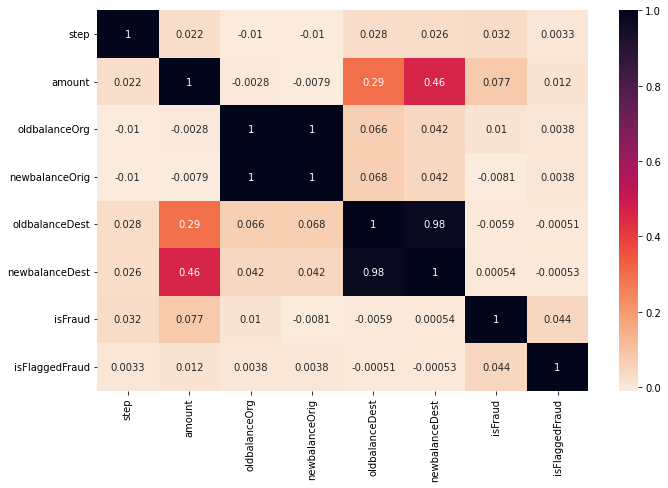

In [10]:
plt.figure(figsize = (11,7))
# Plotting Heatmap
sns.heatmap(df.corr(), annot=True, cmap="rocket_r")

#### There  is a Correlation between oldbalanceOrg, nebalanceorg, oldbalancedest & newbalanceDest

In [11]:
#creating a copy of original dataset 
df1 = df.copy()
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## LABEL ENCODING

In [12]:
# Checking columns with Dtype : Object
Obj = df1.select_dtypes(include = 'object').columns
Obj 

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

### There Are 3 Attributes With Object Dtype. We Need To Convert  Them  into INTEGER in Order To Check MULTICOLINEARITY.

In [13]:
# Label Encoding the columns having 'Object' Dtypes
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in Obj:
    df1[i] = LE.fit_transform(df1[i].astype(str))
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [14]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


## MULTI-COLLINEARITY
### VARIANCE INFLATION FACTOR ( VIF )

In [15]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF
def cal_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

cal_vif(df1)  

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


#### oldbalanceOrg, newbalanceOrig, oldbalanceDest & newbalanceDest have high VIF  & are highly correlated

In [16]:
# Adding new column 'Actual_amount_orig'  to the df1 by subtracting the 'newbalanceOrig' column from the 'oldbalanceOrg' column
df1['Actual_amount_orig'] = df1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis=1)

# Adding new column 'Actual_amount_dest' to the df1 by by subtracting the 'newbalanceDest' column from the 'oldbalanceDest' column
df1['Actual_amount_dest'] = df1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'], axis=1)

# Adding a new column 'TransactionPath' to the 'new_df' dataframe by concatenating the 'nameOrig' and 'nameDest' columns 
df1['TransactionPath'] = df1.apply(lambda x: x['nameOrig'] + x['nameDest'], axis=1)

In [17]:
# Dropping Columns
df1 = df1.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'nameOrig', 'nameDest'], axis=1)
cal_vif(df1)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<AxesSubplot:>

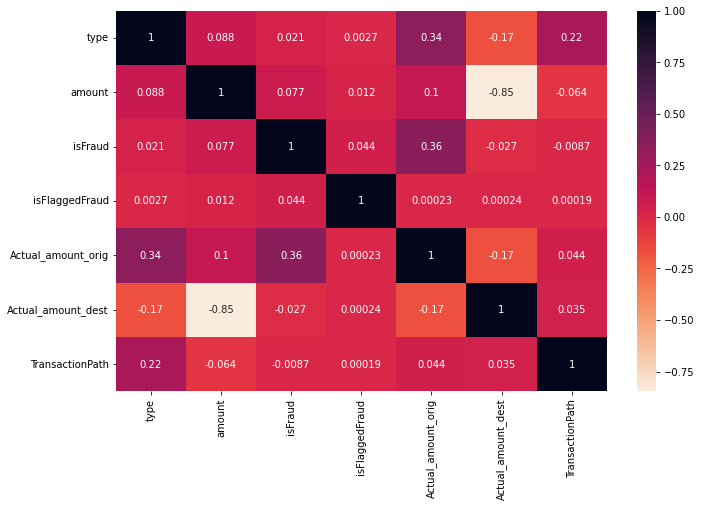

In [18]:
# Heatmap
plt.figure(figsize = (11,7))
sns.heatmap(df1.corr(), annot=True, cmap="rocket_r")

# MODEL BUILDING

In [19]:
# Importing libraries for Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Standardizing Features

In [20]:
# removes the mean and scales each feature/variable to unit variance
scaler = StandardScaler()
df1['Amount'] = scaler.fit_transform(df1['amount'].values.reshape(-1, 1))
df1.drop(['amount'], inplace= True, axis= 1)
Y = df1['isFraud']
X = df1.drop(['isFraud'], axis= 1)

## TRAIN-TEST-SPLIT

In [21]:
# Splitting data into train & test
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.2, random_state= 42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (5090096, 6)
X_test:  (1272524, 6)


## Training Model using ML-Algorithm
### RANDOM FOREST

In [22]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)
Y_pred_RF = random_forest.predict(X_test)
RF_score = random_forest.score(X_test, Y_test) * 100

print('Random Forest Score :', RF_score)

Random Forest Score : 99.9591363306311


### DECISION TREE

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
DT_score = decision_tree.score(X_test, Y_test) * 100

print("Decision Tree Score: ", DT_score)

Decision Tree Score:  99.9233806199333


## Model Evaluation & Validation
### CONFUSION MATRIX

In [24]:
# Confusion Matrix - Random Forest
TP, FP, TN, FN, = confusion_matrix(Y_test, Y_pred_RF).ravel()
print('True Positives :', TP)
print('False Positives :', FP)
print('True Negatives :', TN)
print('False Negatives :', FN)

True Positives : 1270854
False Positives : 50
True Negatives : 470
False Negatives : 1150


In [25]:
# Confusion Matrix - Decision Tree
TP, FP, TN, FN, = confusion_matrix(Y_test, Y_pred_DT).ravel()
print('True Positives :', TP)
print('False Positives :', FP)
print('True Negatives :', TN)
print('False Negatives :', FN)

True Positives : 1270394
False Positives : 510
True Negatives : 465
False Negatives : 1155


## Comparing Both Models

In [26]:
# Random Forest
confusion_matrix_RF = confusion_matrix(Y_test, Y_pred_RF.round()) 
print("Confusion Matrix - Random Forest")
print(confusion_matrix_RF)

print("---------------------------------")

# Decision Tree
confusion_matrix_DT = confusion_matrix(Y_test, Y_pred_DT.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_DT)

Confusion Matrix - Random Forest
[[1270854      50]
 [    470    1150]]
---------------------------------
Confusion Matrix - Decision Tree
[[1270394     510]
 [    465    1155]]


### CLASSIFICATION REPORT

In [27]:
# Random Forest
class_report_RF = classification_report(Y_test, Y_pred_RF)
print('Classification Report - Random Forest')
print(class_report_RF)

print('-----------------------------------------------------')

# Decision Report
class_report_DT = classification_report(Y_test, Y_pred_DT)
print('Classification Report - Decision Tree')
print(class_report_DT)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.71      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

-----------------------------------------------------
Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.69      0.71      0.70      1620

    accuracy                           1.00   1272524
   macro avg       0.85      0.86      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



### The Classification Report / Accuracy of both model is almost equal but Precision of Random forest is geater than Decision Tree.  

## 1. Describe your fraud detection model in elaboration?

Steps involved in building the fraud detection model:
1. Data Analysis & Preprocessing : The first step is to importing the libraries for data analysis and manipulation & than importing  the csv file. Opening the csv file and starting the preprocessing operation like cleaning and transforming the data into a suitable format for analysis.

2. Feature Engineering :  The next step is to extract relevant features from the data that can be used to train the machine learning models. This involves selecting and transforming the data attributes into meaningful features that capture the underlying patterns and behaviors of the users.

3. Model Training: Training the machine learning models using supervised learning algorithms. I have choose two machine learning algorithms to work on this data:-
1. Random Forest : It is suitable for large and complex datasets with many features and can handle both categorical and continuous variables. Random Forest is often used in applications where high accuracy is required.

2. Decision Tree : Decision Trees are easy to interpret and explain, which makes them a popular choice for decision-making applications where transparency and explainability are important. Decision Trees can also handle categorical and continuous features and can be used for both classification and regression tasks.

*Models like Logistic Regression, XGBoost, Bagging & ANN  may give good accuracy but they won't give good precision and recall values.

4. Model evaluation and validation : After training the models, the next step is to evaluate and validate the performance of the models using various metrics, such as accuracy, precision, recall, and F1 score. 



## 2. How did you select variables to be included in the model?

The selection of variables for a fraud detection model is an iterative process that involves careful consideration of the available data, the type of fraud being targeted, and the goals of the model. The selection of variables depends on the type of fraud being targeted, the available data, and the specific goals of the model. 

Here are some common steps that may be followed to select variables for a fraud detection model:

1. Identify potential variables: This involves brainstorming a list of variables that may be relevant for detecting fraud. For example, variables such as transaction amount, transaction frequency, user location, device information, and user behavior may be considered.

2. Evaluate data availability: The variables identified in step 1 may not all be available in the data. Thus, it is essential to evaluate the availability and quality of data for each variable.

3. Evaluate the relevance of variables: Once data availability is assessed, it's necessary to evaluate the relevance of each variable in identifying fraud. Some variables may have a higher correlation with fraudulent activity than others.

4. Reduce dimensionality: If there are many variables available, it may be necessary to reduce the dimensionality to prevent overfitting and increase the model's interpretability. This step involves selecting the most relevant variables and discarding less important ones.

5. Test and refine the model: After selecting variables, the model is tested and refined to improve its accuracy and performance. This step involves iteratively testing the model's performance with different combinations of variables and adjusting the model parameters as necessary.



## 3. What are the key factors that predict fraudulent customer?

Predicting fraudulent customers is a challenging task, and no single factor can guarantee the identification of all fraudsters. However, some key factors that may indicate potential fraudulent activity by customers include:

1. Abnormal transaction patterns: Customers who display abnormal transaction patterns, such as a sudden increase in transaction volume or frequency, may indicate potential fraudulent activity.

2. Behavioral patterns: Customers who engage in suspicious behavior, such as attempting to log in to their account multiple times with incorrect credentials or making unusual requests, may indicate potential fraudulent activity.

3. Geolocation: The location of a customer can be an important factor in predicting fraud. For example, if a customer is making transactions from a high-risk country, it may be an indication of potential fraudulent activity.

4. Credit history: Customers with a history of bad credit or delinquent payments may be more likely to engage in fraudulent activities.

5. Personal information: Customers who provide incomplete or inconsistent personal information may be more likely to engage in fraudulent activities.

6. Device and network information: Customers who use multiple devices or networks to access their account or make transactions may indicate potential fraudulent activity. 



## 4. What kind of prevention should be adopted while company update its infrastructure?

When a company updates its infrastructure, it is critical to ensure that fraud prevention measures are in place to protect against potential fraudulent transactions. Here are some key prevention measures that a company should adopt:

1. Authentication: A robust authentication system is essential to ensure that only authorized personnel can access sensitive information or make changes to the infrastructure. This could include two-factor authentication or other forms of secure authentication.

2. Encryption: Sensitive data should be encrypted both in transit and at rest. This can help prevent unauthorized access to the data and protect it from potential breaches.

3. Fraud detection systems: The company should have fraud detection systems in place to identify and flag any suspicious transactions or activities. These systems could include machine learning algorithms that analyze transaction patterns and identify anomalies.

4. Monitoring and reporting: The company should continuously monitor its infrastructure for any suspicious activities or anomalies. It should also have a reporting mechanism in place to report any potential fraud incidents to relevant authorities.

5. Employee training: Employee training is critical to ensure that employees are aware of potential fraud risks and know how to identify and report suspicious activities. This training should be ongoing and cover all aspects of fraud prevention.


## 5. Do these factors make sense? If yes, How? If not, How not?

YES, these factors can make sense in the context of fraud detection as they are based on patterns and behaviors that are typically associated with fraudulent activities. However, it is important to note that these factors alone may not be sufficient to predict fraud accurately. Fraud detection models typically use a combination of these factors and other features to identify fraudulent customers with high accuracy.

It is also important to note that some of these factors may not always indicate fraudulent activity. For example, a customer may exhibit unusual behavior due to a legitimate reason, such as traveling or making a one-time large purchase. Therefore, it is essential to have a comprehensive understanding of the domain and context to avoid false positives and ensure that the fraud detection model is accurate and effective.